In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

In [2]:
img = cv2.imread('models/s.jpg')
img.shape

(951, 634, 3)

In [3]:
i=cv2.imshow('image', img)
i

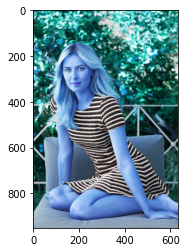

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(951, 634)

In [6]:
gray

array([[ 35,  32,  28, ..., 101, 105, 108],
       [ 33,  32,  29, ..., 138, 104,  94],
       [ 42,  43,  41, ..., 174, 123,  91],
       ...,
       [188, 155, 196, ..., 155, 178, 150],
       [179, 155, 189, ..., 157, 167, 140],
       [172, 156, 176, ..., 159, 172, 145]], dtype=uint8)

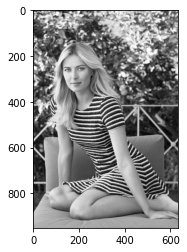

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
face_cascade=cv2.CascadeClassifier('models/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('models/opencv/haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[116, 209, 129, 129]])

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(116, 209, 129, 129)

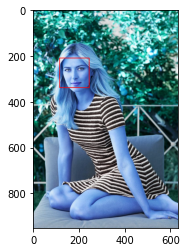

In [10]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

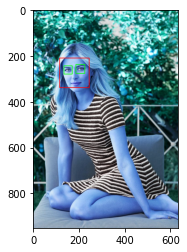

In [11]:
cv2.destroyAllWindows()
faces=face_cascade.detectMultiScale(gray,1.3,5)
for (x,y,w,h) in faces:
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

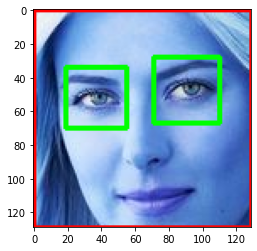

In [12]:
plt.imshow(roi_color,cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

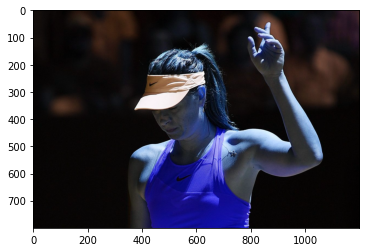

In [14]:
c_img=cv2.imread('models/test_images/NINTCHDBPICT000555871244-e1579584387360.jpg')
plt.imshow(c_img)

In [15]:
cropped_img=get_cropped_image_if_2_eyes('models/test_images/NINTCHDBPICT000555871244-e1579584387360.jpg')
cropped_img

In [16]:
path_to_data="models/images_dataset/"
path_to_cr_data="models/crop_images/"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['models/images_dataset/lionel_messi',
 'models/images_dataset/maria_sharapova',
 'models/images_dataset/roger_federer',
 'models/images_dataset/serena_williams',
 'models/images_dataset/virat_kohli']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:",cropped_folder)
                
            cropped_file_name=celebrity_name+ str(count) +".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
            

lionel_messi
maria_sharapova
Generating cropped images in folder: models/crop_images/maria_sharapova
roger_federer
Generating cropped images in folder: models/crop_images/roger_federer
